# **Feature engeneering**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry_convert as pc

In [2]:
# Dataset download
cyclists_df = pd.read_csv('../dataset/cyclists.csv')
races_df = pd.read_csv('../dataset/races.csv')

#### ```categorical_height``` column


Since cycling is a sport in which, on average for the same height, the weight is similar, we group height by category with 5cm intervals to look for possible outliers in weight using conditional boxplots.

In [3]:
# Define the bins for the height category and create the feature
bins = [154, 159, 164, 169, 174, 179, 184, 189, 194, 199, 204]
labels = list(range(10))

cyclists_df['categorical_height'] = pd.cut(cyclists_df['height'], bins=bins, labels=labels, right=False, include_lowest=True)

print(cyclists_df[['height', 'categorical_height']].head(10))

   height categorical_height
0     NaN                NaN
1   182.0                  5
2   189.0                  7
3   192.0                  7
4   171.0                  3
5   177.0                  4
6     NaN                NaN
7   191.0                  7
8   192.0                  7
9     NaN                NaN


Conditional Box Plot

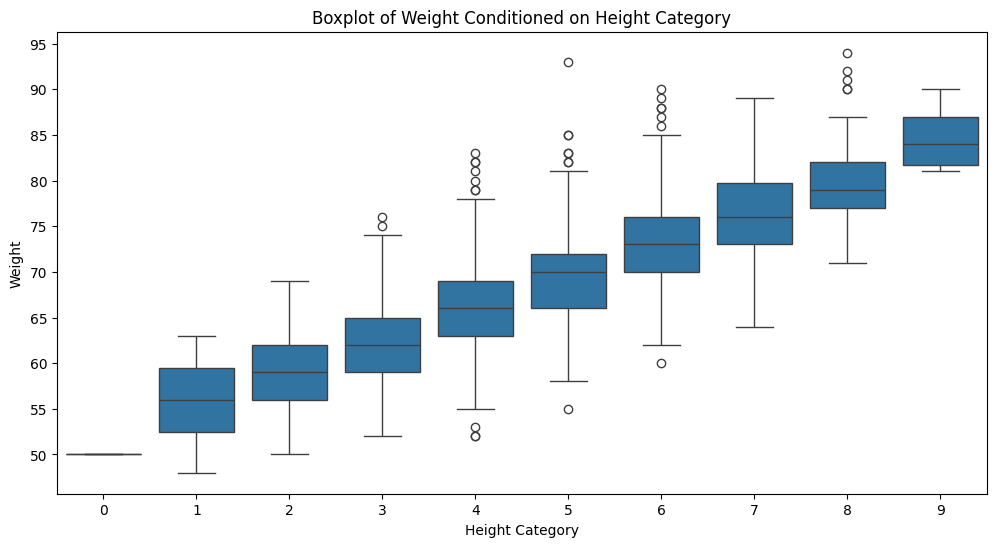

In [4]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='categorical_height', y='weight', data=cyclists_df)
plt.title('Boxplot of Weight Conditioned on Height Category')
plt.xlabel('Height Category')
plt.ylabel('Weight')

# Set y-axis intervals
plt.yticks(np.arange(50, cyclists_df['weight'].max() + 5, 5))

plt.show()

We show the number of cyclists in each defined category (excluding those with zero weight) to evaluate the significance of the outliers identified from the boxplots.

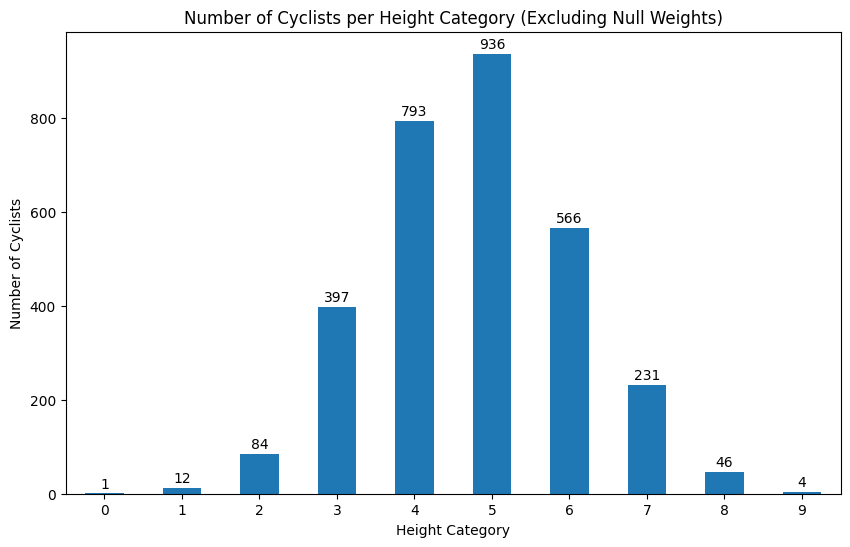

In [5]:
# Exclude cyclists with null weight
cyclists_df_non_null_weight = cyclists_df[cyclists_df['weight'].notnull()]

# Count the number of cyclists in each height category
categorical_height_counts = cyclists_df_non_null_weight['categorical_height'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
ax = categorical_height_counts.plot(kind='bar')
plt.title('Number of Cyclists per Height Category (Excluding Null Weights)')
plt.xlabel('Height Category')
plt.ylabel('Number of Cyclists')

# Add the count above each bin
for i, count in enumerate(categorical_height_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()

#### ```BMI_idx``` column

In [6]:
from utils import compute_bmi

# Apply the function to compute BMI index for each cyclist
cyclists_df['BMI_idx'] = cyclists_df.apply(
    lambda row: compute_bmi(row['weight'], row['height']),
    axis=1
)

print(cyclists_df[['weight', 'height', 'BMI_idx']].head(10))

   weight  height  BMI_idx
0     NaN     NaN      NaN
1    74.0   182.0    22.34
2    69.0   189.0    19.32
3    78.0   192.0    21.16
4    55.0   171.0    18.81
5    67.0   177.0    21.39
6     NaN     NaN      NaN
7    71.5   191.0    19.60
8    73.0   192.0    19.80
9     NaN     NaN      NaN


Categorizing BMI index

In [7]:
# Define the BMI categories and their corresponding labels
bmi_bins = [0, 18.5, 24.9, 29.9, np.inf]
bmi_labels = ['Underweight', 'Normal weight', 'Overweight', 'Obese']

# Create the 'BMI' categorical column
cyclists_df['BMI'] = pd.cut(cyclists_df['BMI_idx'], bins=bmi_bins, labels=bmi_labels, right=False, include_lowest=True)

# Display the first few rows to verify
print(cyclists_df[['_url', 'BMI_idx', 'BMI']].head(10))

                   _url  BMI_idx            BMI
0           bruno-surra      NaN            NaN
1            gerard-rue    22.34  Normal weight
2              jan-maas    19.32  Normal weight
3  nathan-van-hooydonck    21.16  Normal weight
4      jose-felix-parra    18.81  Normal weight
5       manuel-penalver    21.39  Normal weight
6          willy-moonen      NaN            NaN
7             chad-haga    19.60  Normal weight
8      joost-van-leijen    19.80  Normal weight
9          scott-davies      NaN            NaN


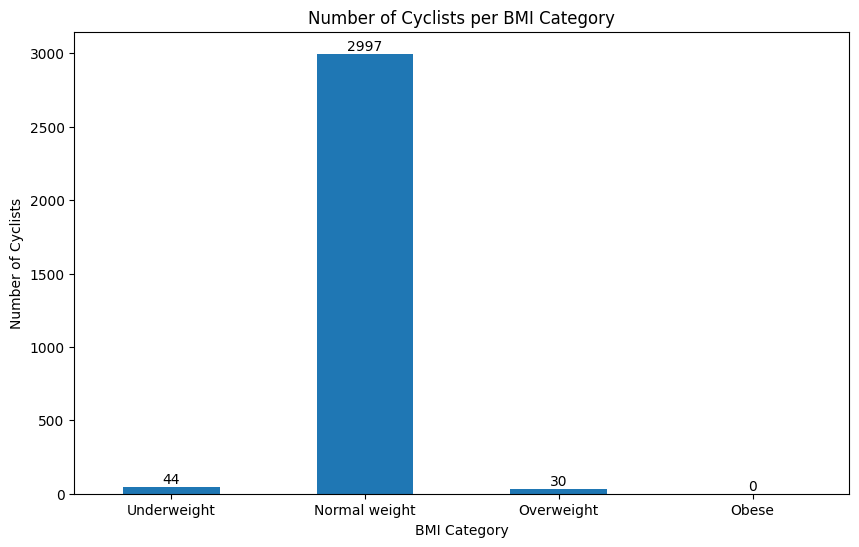

In [8]:
# Count the number of cyclists per BMI category
bmi_category_counts = cyclists_df['BMI'].value_counts().sort_index()

# Plot the results
plt.figure(figsize=(10, 6))
ax = bmi_category_counts.plot(kind='bar')
plt.title('Number of Cyclists per BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Number of Cyclists')

# Add the count above each bin
for i, count in enumerate(bmi_category_counts):
    ax.text(i, count + 5, str(count), ha='center', va='bottom')

# Rotate x-axis labels to horizontal
plt.xticks(rotation=0)

plt.show()

As expected the most of the cyclists are normal weight

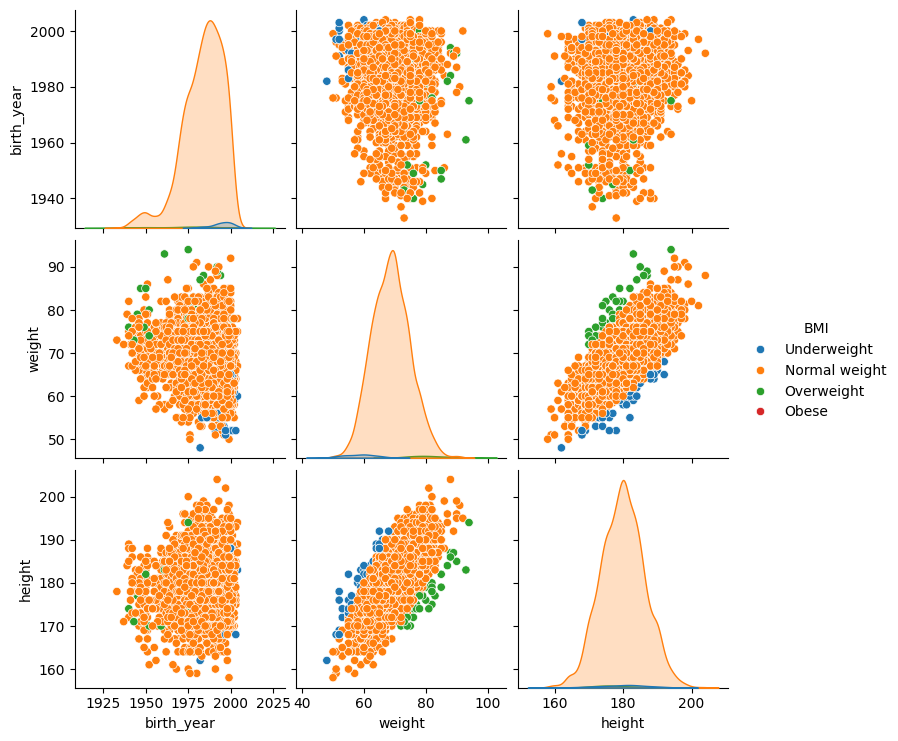

In [9]:
cyclists_df = cyclists_df.drop(columns=['BMI_idx'])
# Create a pairplot excluding the 'categorical_height' column
sns.pairplot(cyclists_df.drop(columns=[]), hue='BMI')
plt.show()

#### ```continent``` column

In [10]:
# Function to convert country name to continent
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return 'Unknown'

# Apply the function to create a new column 'continent'
cyclists_df['continent'] = cyclists_df['nationality'].apply(country_to_continent)

# Display the first few rows to verify
print(cyclists_df[['nationality', 'continent']].head(10))

     nationality      continent
0          Italy         Europe
1         France         Europe
2    Netherlands         Europe
3        Belgium         Europe
4          Spain         Europe
5          Spain         Europe
6        Belgium         Europe
7  United States  North America
8    Netherlands         Europe
9            NaN        Unknown


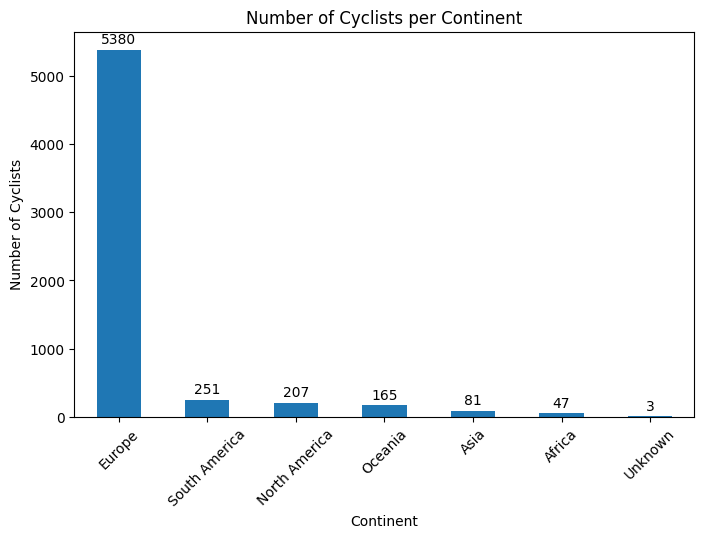

In [11]:
# Count the number of cyclists per continent
continent_counts = cyclists_df['continent'].value_counts()

# Plot the number of cyclists per continent as a histogram
plt.figure(figsize=(8, 5))
ax = continent_counts.plot(kind='bar')
plt.title('Number of Cyclists per Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Cyclists')
plt.xticks(rotation=45)

# Add the count above each bin
for i, count in enumerate(continent_counts):
    ax.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

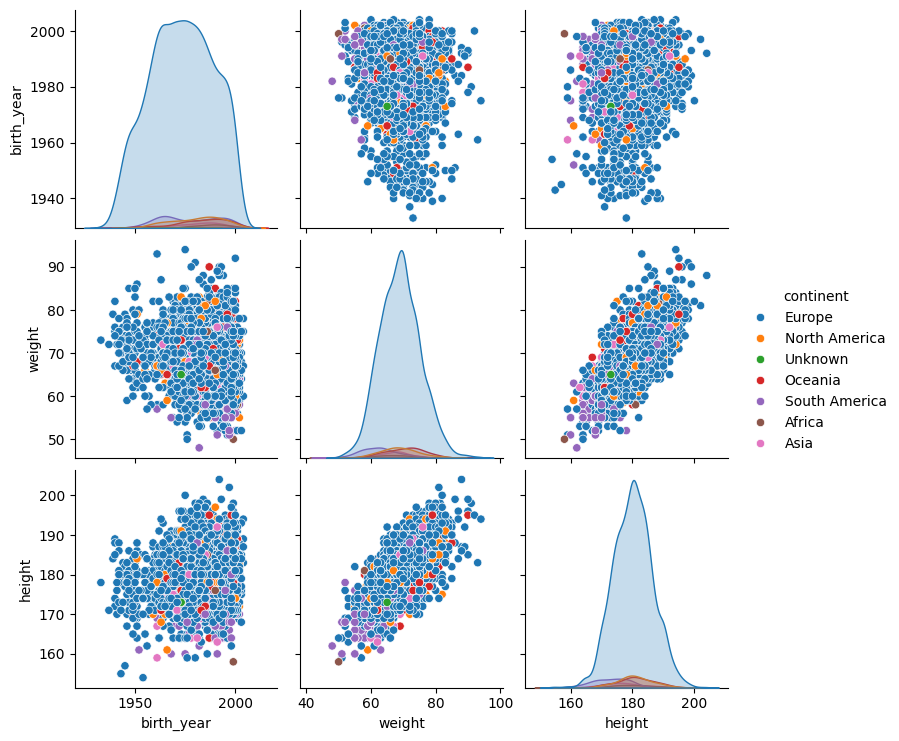

In [12]:
# Create a pairplot excluding the 'categorical_height' column
sns.pairplot(cyclists_df.drop(columns=['categorical_height']), hue='continent')
plt.show()

Given that majority of cyclists are european let's deep into european cyclist analysis

In [13]:
# Filter cyclists by European continent
european_df = cyclists_df[cyclists_df['continent'] == 'Europe'].drop(columns=['continent'])

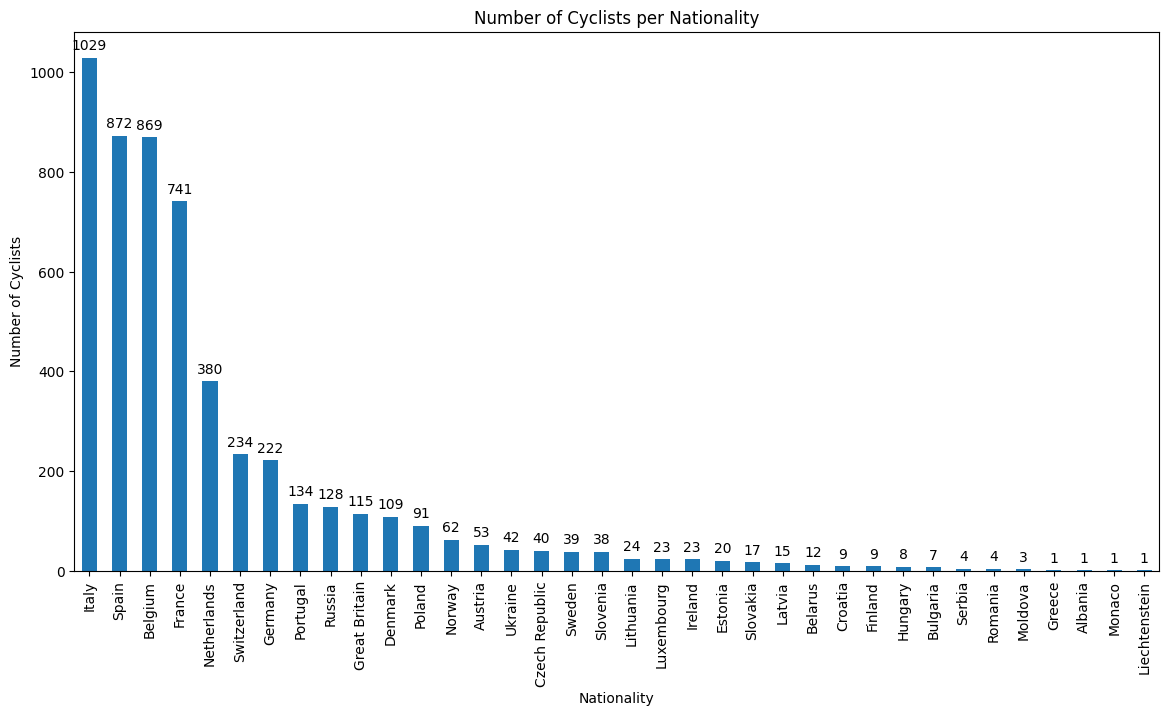

In [14]:
# Count the number of cyclists per nationality
nationality_counts = european_df['nationality'].value_counts()

# Plot the number of cyclists per nationality as a histogram
plt.figure(figsize=(14, 7))
ax = nationality_counts.plot(kind='bar')
plt.title('Number of Cyclists per Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Cyclists')
plt.xticks(rotation=90)

# Add the count above each bin
for i, count in enumerate(nationality_counts):
    ax.text(i, count + 10, str(count), ha='center', va='bottom')

plt.show()

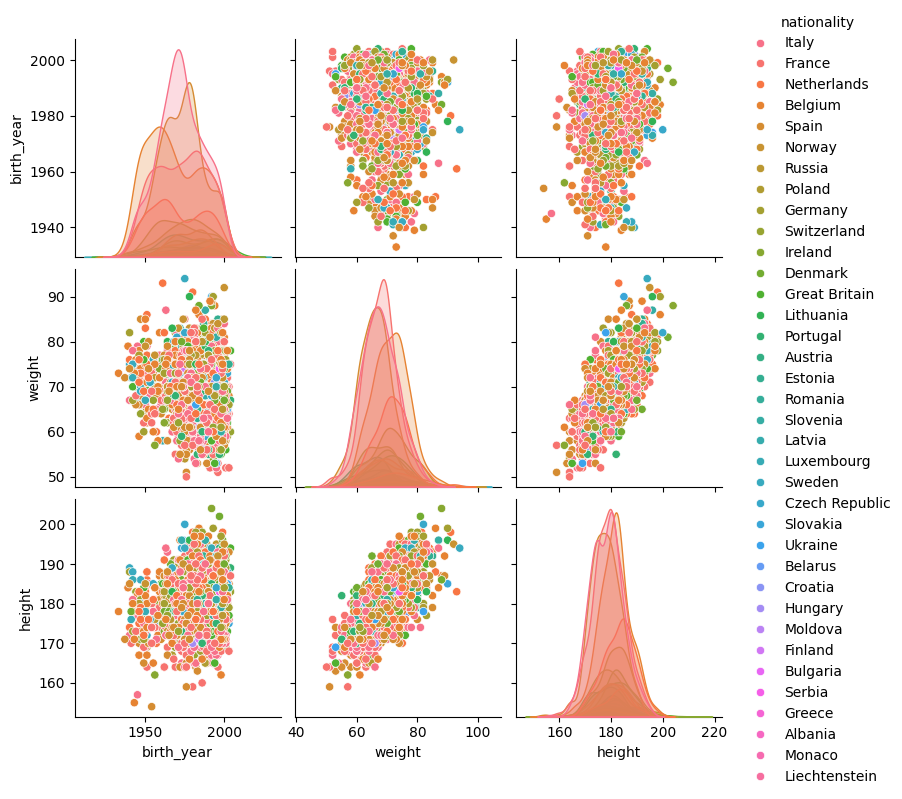

In [15]:
# Create a pairplot excluding the 'categorical_height' column
sns.pairplot(european_df.drop(columns=['categorical_height']), hue='nationality')
plt.show()

#### ```stages_won``` column

In [19]:
# Group by cyclist and count the number of times position is 0
stages_won = races_df[races_df['position'] == 0].groupby('cyclist').size().reset_index(name='position')

# Add cyclists who never had position 0 with counter set to 0
all_cyclists = pd.DataFrame(races_df['cyclist'].unique(), columns=['cyclist'])
stages_won_df = pd.merge(all_cyclists, stages_won, on='cyclist', how='left').fillna(0)

# Ensure position is an integer
stages_won_df['position'] = stages_won_df['position'].astype(int)
# Merge the stages_won_df with cyclists_df to add the 'win' column
cyclists_df = cyclists_df.merge(stages_won_df, left_on='_url', right_on='cyclist', how='left')

# Rename the 'position' column to 'win'
cyclists_df = cyclists_df.rename(columns={'position': 'win'})

# Drop the redundant 'cyclist' column
cyclists_df = cyclists_df.drop(columns=['cyclist'])

print(cyclists_df.head(10))

                   _url                  name  birth_year  weight  height  \
0           bruno-surra          Bruno  Surra      1964.0     NaN     NaN   
1            gerard-rue           Gérard  Rué      1965.0    74.0   182.0   
2              jan-maas             Jan  Maas      1996.0    69.0   189.0   
3  nathan-van-hooydonck  Nathan Van Hooydonck      1995.0    78.0   192.0   
4      jose-felix-parra     José Félix  Parra      1997.0    55.0   171.0   
5       manuel-penalver      Manuel  Peñalver      1998.0    67.0   177.0   
6          willy-moonen         Willy  Moonen      1947.0     NaN     NaN   
7             chad-haga            Chad  Haga      1988.0    71.5   191.0   
8      joost-van-leijen      Joost van Leijen      1984.0    73.0   192.0   
9          scott-davies         Scott  Davies         NaN     NaN     NaN   

     nationality categorical_height            BMI      continent  win  win  
0          Italy                NaN            NaN         Europe  0.0  0.